<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


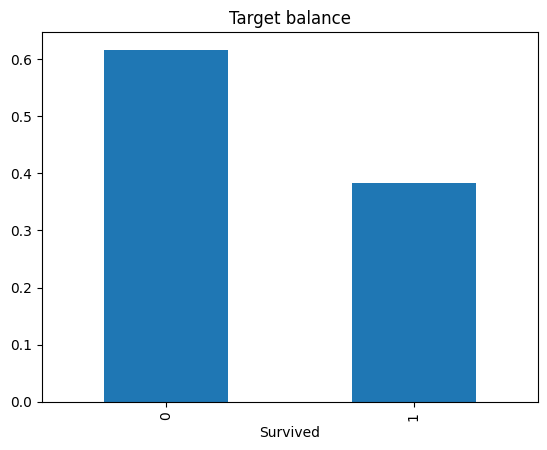

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,True


In [4]:
# %%
import pandas as pd
import matplotlib.pyplot as plt

# %%
df = pd.read_csv("../data/01_raw/Titanic-Dataset.csv")
print(df.head())          # w skrypcie użyj print, bo samo df.head() nic nie wyświetli
print(df.info())
print(df.describe())

# %%
print(df.isna().mean().sort_values(ascending=False).head(10))

# %%
df["Survived"].value_counts(normalize=True).plot.bar()
plt.title("Target balance")
plt.show()

# %%
clean = df.copy()
clean["Sex"] = (clean["Sex"] == "male").astype(int)
clean["Age"] = clean["Age"].fillna(clean["Age"].median())
clean["Fare"] = clean["Fare"].fillna(clean["Fare"].median())
clean["Embarked"] = clean["Embarked"].fillna(clean["Embarked"].mode().iloc[0])
clean = pd.get_dummies(clean, columns=["Embarked"], drop_first=True)
print(clean.head())
